In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Data Loading

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\Intership\\task 6\\train.csv")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


# Basic Understanding of data

In [3]:
print(f'Shape of Datset:{df.shape}\n')
print(f'Null values in a Datset:\n{df.isnull().sum()}\n')
print(f'Duplicated values in a Datset:{df.duplicated().sum()}\n')

Shape of Datset:(9800, 18)

Null values in a Datset:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Duplicated values in a Datset:0



In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789
unique,4916,1229,1326,4,793,793,3,1,529,48,4,1860,3,17,1848
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5849,35,35,5096,9789,891,1946,3140,18,5903,1492,47


In [7]:
df_numeric=df.select_dtypes(include='number')
print(f'Number of Numerical Features:{len(df_numeric.columns)}')
df_category=df.select_dtypes(include='object')
print(f'Number of categorical Features:{len(df_category.columns)}')

Number of Numerical Features:3
Number of categorical Features:15


# Data Handling

In [8]:
df['Date_Order'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Date_Ship'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df.drop(['Row ID','Order Date','Ship Date'],axis='columns',inplace=True)

In [9]:
df.head(3)

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date_Order,Date_Ship
0,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11-08,2017-11-11
1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11-08,2017-11-11
2,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017-06-12,2017-06-16


# Exploratory Data Analysis

In [10]:
def EDA(customer_data,feature1,feature2,colors):
    plt.figure(figsize=(12, 10)) 
    plot=sns.barplot(data=customer_data, 
                     x=feature1, 
                     y=feature2, 
                     palette=colors)
    for p in plot.patches:
        count=int(p.get_height())
        plot.annotate(f'${count:,.0f}',(p.get_x()+p.get_width()/2,p.get_height()+10),ha='center',va='bottom',
                     fontweight='bold',fontsize=10)
    plt.title(f'Top 10 {feature1} by Total Sales Value', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(feature1, fontsize=12, fontweight='bold')
    plt.ylabel(feature2, fontsize=12, fontweight='bold')
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


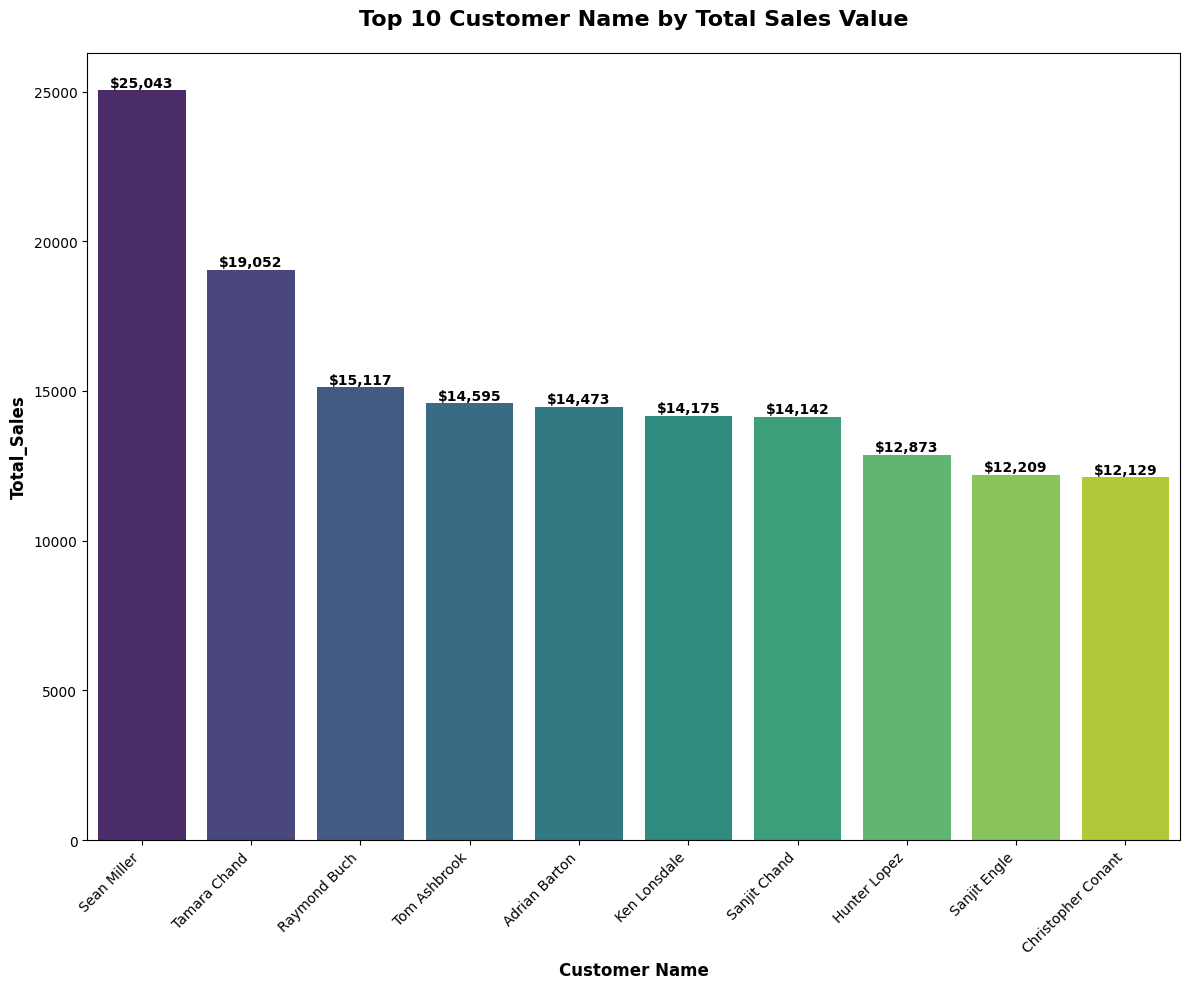

In [11]:
customer_sales = df.groupby('Customer Name').agg(
    Total_Sales=('Sales', 'sum')
).reset_index()
customer_sales=customer_sales.sort_values(by='Total_Sales',ascending=False)
top_ten_customer_sales=customer_sales.head(10)
EDA(top_ten_customer_sales,'Customer Name','Total_Sales','viridis')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


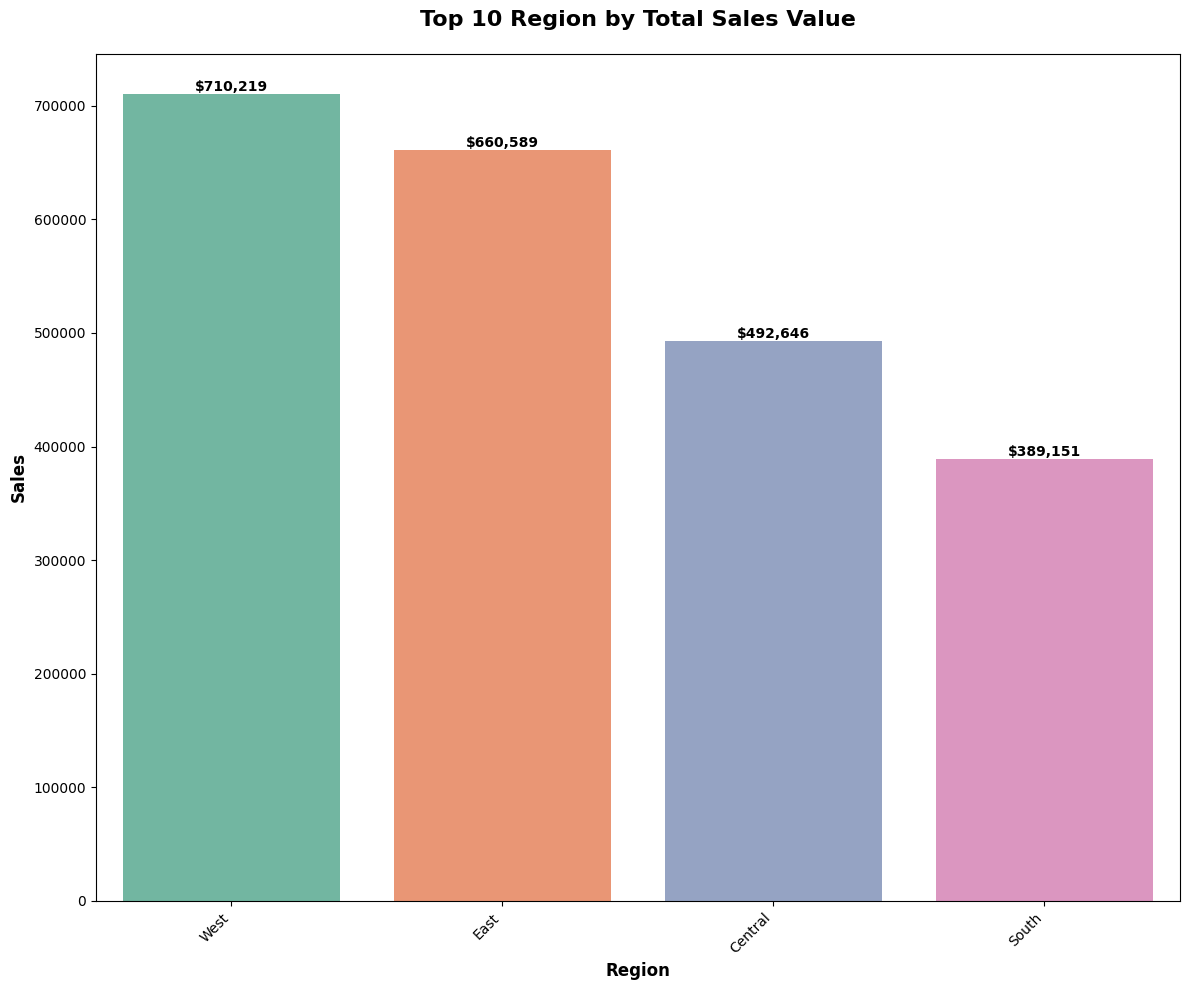

In [12]:
region_sales = df.groupby('Region').agg(
    Sales=('Sales', 'sum')
).reset_index()
region_sales=region_sales.sort_values(by='Sales',ascending=False)
EDA(region_sales,'Region','Sales','Set2')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


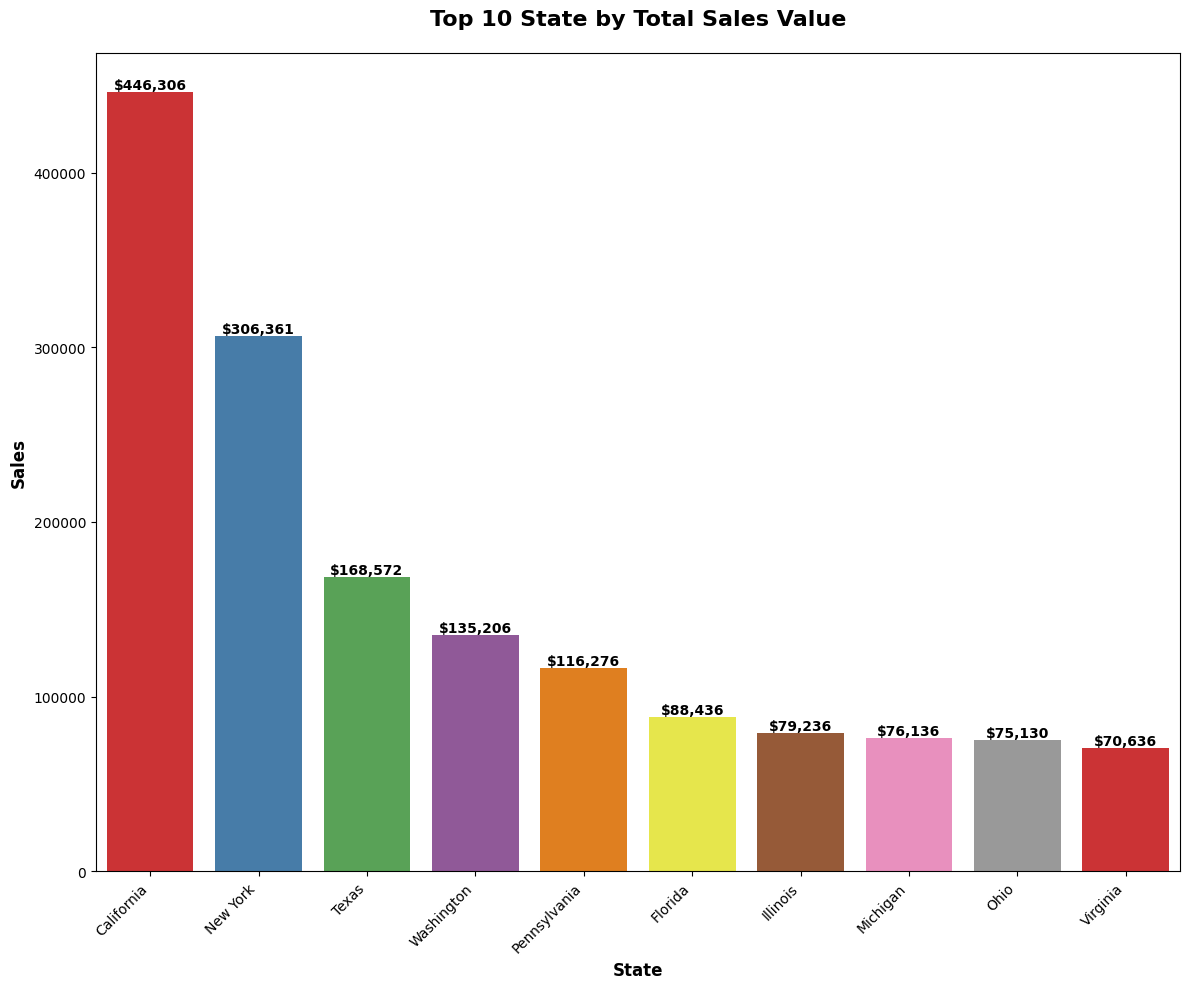

In [13]:
state_sales = df.groupby('State').agg(
    Sales=('Sales', 'sum')
).reset_index()
top_ten_state_sales=state_sales.sort_values(by='Sales',ascending=False)
EDA(top_ten_state_sales.head(10),'State','Sales','Set1')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


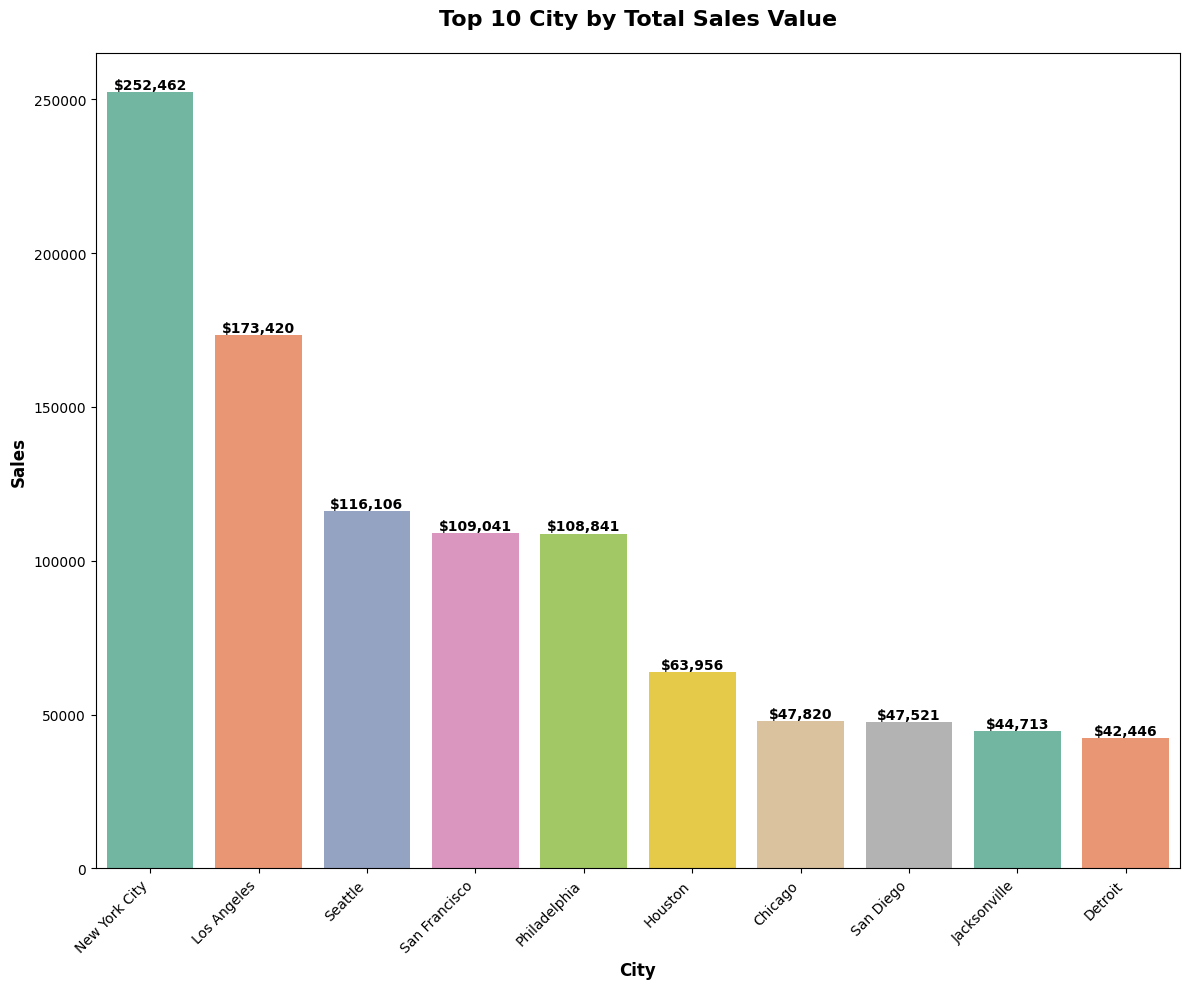

In [14]:
city_sales = df.groupby('City').agg(
    Sales=('Sales', 'sum')
).reset_index()
top_ten_city_sales=city_sales.sort_values(by='Sales',ascending=False)
EDA(top_ten_city_sales.head(10),'City','Sales','Set2')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


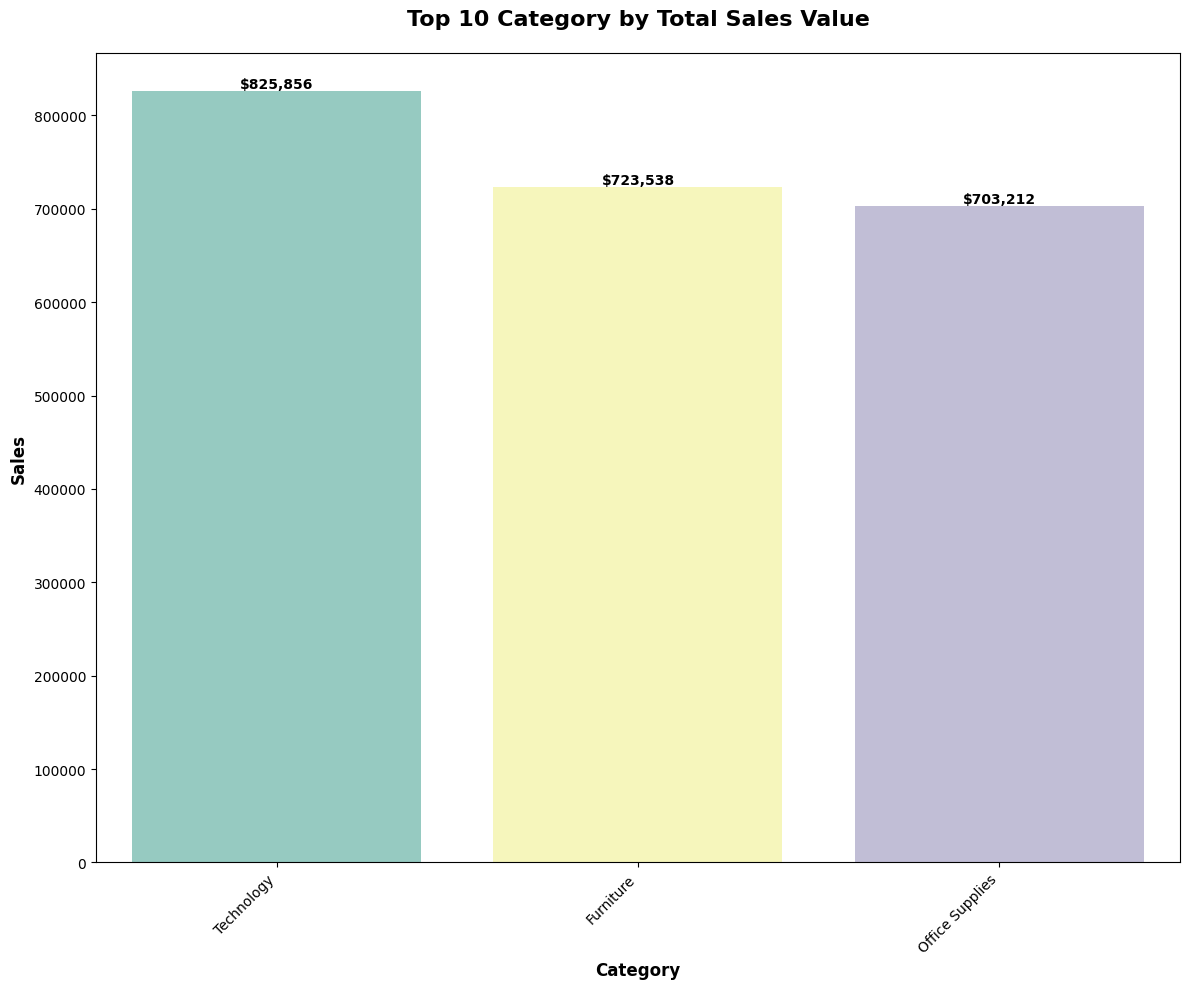

In [15]:
category_sales = df.groupby('Category').agg(
    Sales=('Sales', 'sum')
).reset_index()
category_sales=category_sales.sort_values(by='Sales',ascending=False)
EDA(category_sales,'Category','Sales','Set3')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


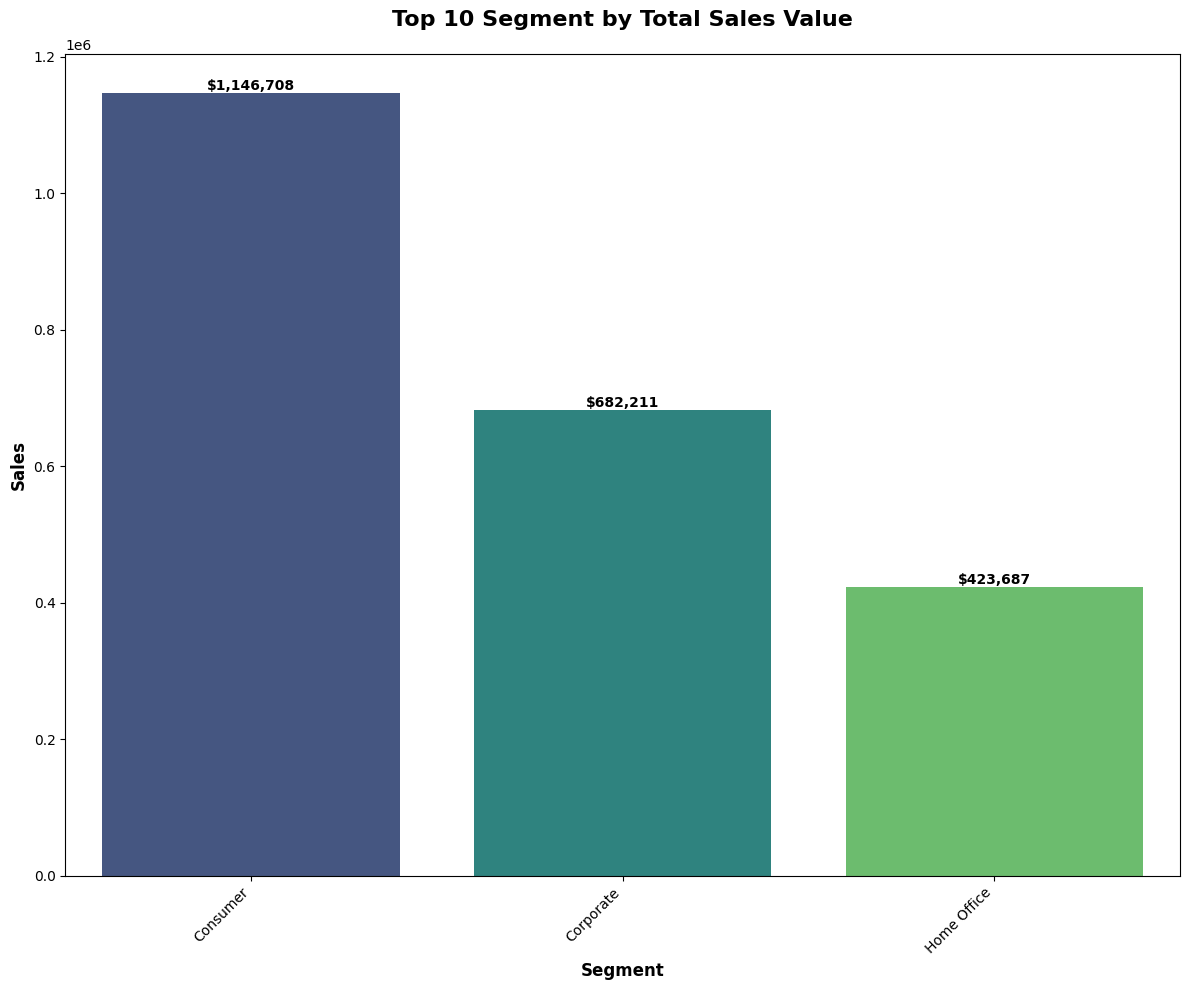

In [16]:
segmentt_sales = df.groupby('Segment').agg(
    Sales=('Sales', 'sum')
).reset_index()
segmentt_sales=segmentt_sales.sort_values(by='Sales',ascending=False)
EDA(segmentt_sales,'Segment','Sales','viridis')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


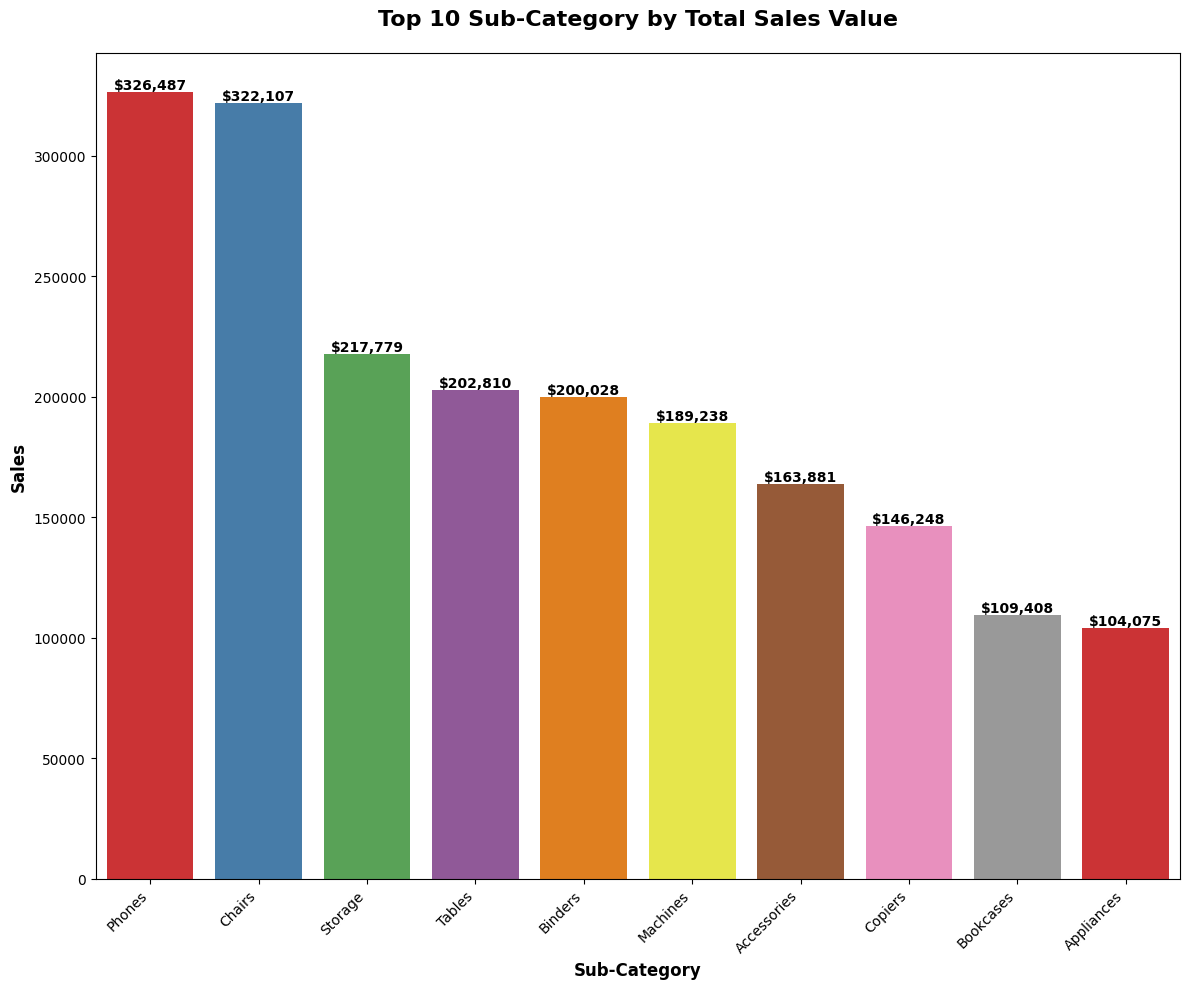

In [17]:
sub_category_sales = df.groupby('Sub-Category').agg(
    Sales=('Sales', 'sum')
).reset_index()
top_ten_sub_category_sales=sub_category_sales.sort_values(by='Sales',ascending=False)
EDA(top_ten_sub_category_sales.head(10),'Sub-Category','Sales','Set1')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\494880114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=customer_data,


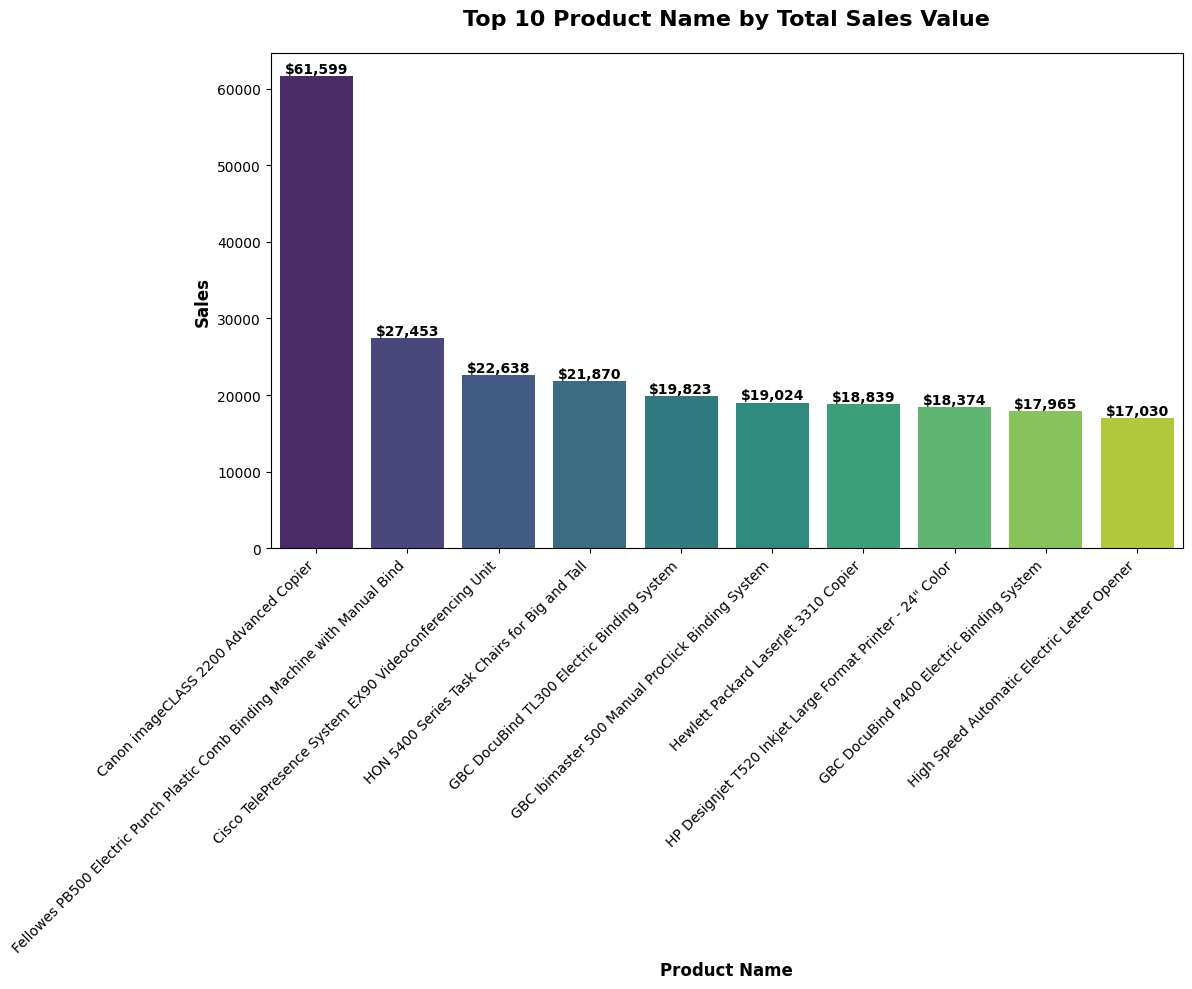

In [18]:
product_sales = df.groupby('Product Name').agg(
    Sales=('Sales', 'sum')
).reset_index()
top_ten_product_sales=product_sales.sort_values(by='Sales',ascending=False)
EDA(top_ten_product_sales.head(10),'Product Name','Sales','viridis')

# Data Stationary Test

In [19]:
from statsmodels.tsa.stattools import adfuller,kpss
def adf_test(series):
    result = adfuller(series)
    print('ADF Test Results:')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    if result[1] <= 0.05:
        print("Reject null hypothesis - Series is STATIONARY")
    else:
        print("Fail to reject null hypothesis - Series is NON-STATIONARY")
    return result[1]

p_value = adf_test(df['Sales'])

ADF Test Results:
ADF Statistic: -98.277968
p-value: 0.000000
Reject null hypothesis - Series is STATIONARY


# Sales Trends

In [20]:
def sales(data, freq='D'):
    if 'Date_Order' not in data.columns or 'Sales' not in data.columns:
        raise ValueError("DataFrame must contain 'Date_Order' and 'Sales' columns.")
    if not pd.api.types.is_datetime64_any_dtype(data['Date_Order']):
        raise TypeError("'Date_Order' must be a datetime column.")
    agg_sales = data.groupby(pd.Grouper(key='Date_Order', freq=freq))['Sales'].sum().reset_index()
    return agg_sales
def plot(compact_data,figsize=(9,4),color='grey',freq='D'):
    plt.figure(figsize=figsize)
    sns.lineplot(data=compact_data, x='Date_Order', y='Sales', marker='o',markersize=5,color=color)
    titles = {'D': 'Daily Sales', 'W': 'Weekly Sales', 'M': 'Monthly Sales'}
    plt.title(titles.get(freq, f'Sales ({freq})'))
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.tight_layout()

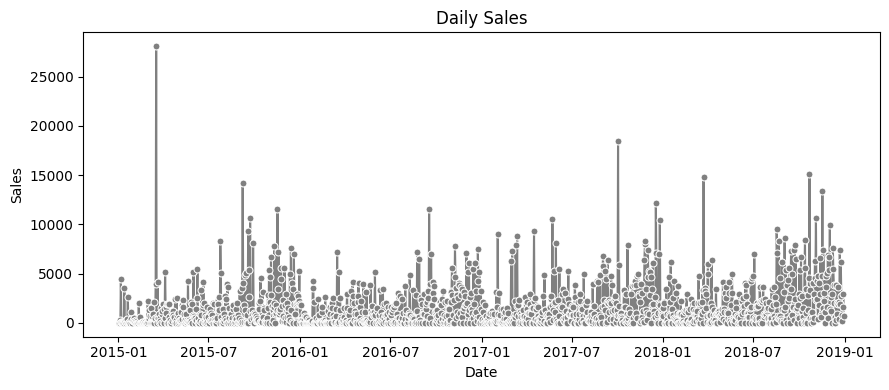

In [21]:
daily_sales=sales(data=df, freq='D')
plot(daily_sales,figsize=(9,4),color='grey',freq='D')

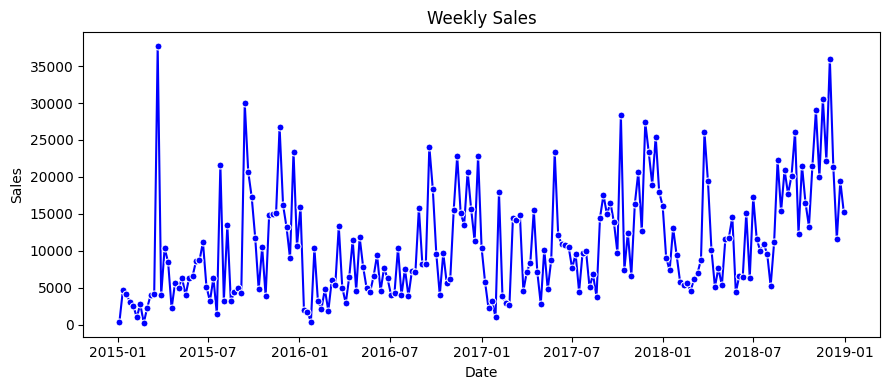

In [22]:
weekly_sales=sales(data=df, freq='W')
plot(weekly_sales,figsize=(9,4),color='blue',freq='W')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15048\2819116010.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agg_sales = data.groupby(pd.Grouper(key='Date_Order', freq=freq))['Sales'].sum().reset_index()


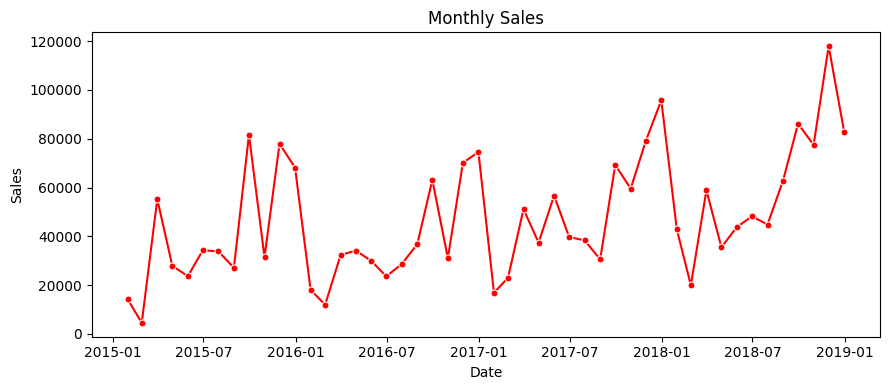

In [23]:
Monthly_sales=sales(data=df, freq='M')
plot(Monthly_sales,figsize=(9,4),color='red',freq='M')

# Train SARIMAX Model

In [24]:
Weekly_sales=weekly_sales.set_index('Date_Order')

## Split datsset

In [25]:
train_size = int(len(Weekly_sales) * 0.8)
train = Weekly_sales[:train_size]
test = Weekly_sales[train_size:]
print(f'len of train dataset:{len(train)} and test dataset:{len(test)}')

len of train dataset:167 and test dataset:42


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

### Apply auto_arima to find best parameters for SARIMAX

In [27]:
auto_model = pm.auto_arima(
    Weekly_sales['Sales'],                
    seasonal=True,              
    m=7,                       
    stepwise=True,             
    suppress_warnings=True,
    error_action="ignore"
)
order = auto_model.order
seasonal_order = auto_model.seasonal_order
print(f"SARIMA{order}{seasonal_order}")
model = SARIMAX(train['Sales'], order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

SARIMA(2, 1, 1)(0, 0, 0, 7)


C:\Users\Qadri Laptop\PycharmProjects\numpy\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Qadri Laptop\PycharmProjects\numpy\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [28]:
predictions = result.predict(start=len(train), end=len(Weekly_sales)-1, dynamic=False)

In [29]:
historical_model = SARIMAX(Weekly_sales['Sales'], order=order, seasonal_order=seasonal_order)
historical_result = historical_model.fit(disp=False)

C:\Users\Qadri Laptop\PycharmProjects\numpy\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Qadri Laptop\PycharmProjects\numpy\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [30]:
forecast_steps = 30
forecast = historical_result.get_forecast(steps=forecast_steps)
forecast_df = pd.DataFrame({
    'Forecast': forecast.predicted_mean,
    'Lower_CI': forecast.conf_int()['lower Sales'],
    'Upper_CI': forecast.conf_int()['upper Sales']
})
last_date = Weekly_sales.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Visualization

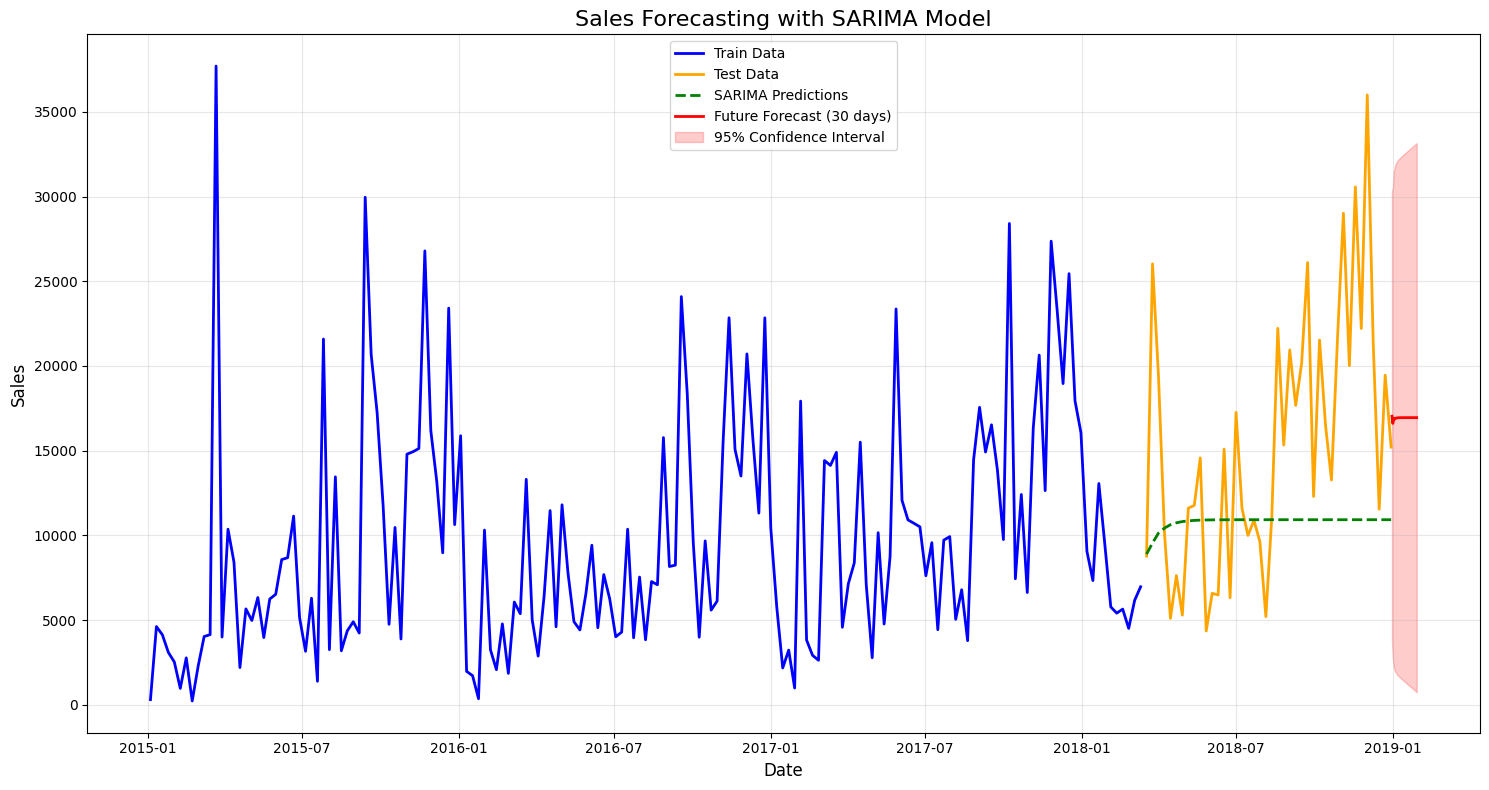

In [31]:
plt.figure(figsize=(15, 8))
plt.plot(train.index, train['Sales'], label="Train Data", color='blue', linewidth=2)
plt.plot(test.index, test['Sales'], label="Test Data", color='orange', linewidth=2)
plt.plot(predictions.index, predictions, label="SARIMA Predictions", color='green', linestyle='--', linewidth=2)
plt.plot(forecast_index, forecast_df['Forecast'], label="Future Forecast (30 days)", color='red', linewidth=2)
plt.fill_between(forecast_index, 
                forecast_df['Lower_CI'], 
                forecast_df['Upper_CI'], 
                color='red', alpha=0.2, label="95% Confidence Interval")

plt.title("Sales Forecasting with SARIMA Model", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()